In [1]:
Hari Kiran Vaddi Gangaraju--20021466
Lokesh --
Deekshith Ramavath --20027400

In [17]:
import pandas as pd
links_df = pd.read_csv('links.csv')
print(links_df.head())

        long        lat  order  piece  linkid  group  citycode
0  10.891016  48.361079      1      1       0    0.1  augsburg
1  10.890894  48.360993      2      1       0    0.1  augsburg
2  10.890642  48.360853      3      1       0    0.1  augsburg
3  10.890404  48.360719      4      1       0    0.1  augsburg
4  10.889994  48.360497      5      1       0    0.1  augsburg


In [3]:
print(links_df.describe())

                long            lat          order     piece         linkid  \
count  140858.000000  140858.000000  140858.000000  140858.0  140858.000000   
mean       13.895125      44.259727       4.738212       1.0     980.086435   
std        54.904581      17.221084       4.291680       0.0    1228.377397   
min      -118.305469     -37.829347       1.000000       1.0       0.000000   
25%        -0.114052      43.629375       2.000000       1.0     160.000000   
50%         8.431802      48.856960       4.000000       1.0     461.000000   
75%         9.965607      51.530333       6.000000       1.0    1270.000000   
max       144.994463      54.710582      87.000000       1.0    5223.000000   

               group  
count  140858.000000  
mean      980.186435  
std      1228.377397  
min         0.100000  
25%       160.100000  
50%       461.100000  
75%      1270.100000  
max      5223.100000  


In [4]:
# Check for any missing values in the DataFrame
missing_values = links_df.isnull().sum()
# Print the count of missing values for each column
print(missing_values)
# Drop rows with missing values (if needed)
links_df = links_df.dropna()
# Fill missing values forward (if needed)
links_df = links_df.fillna(method='ffill')

long        0
lat         0
order       0
piece       0
linkid      0
group       0
citycode    0
dtype: int64


In [5]:
# Convert categorical columns using one-hot encoding
links_df = pd.get_dummies(links_df, columns=['group', 'citycode'])

In [6]:
# Import the StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Specify the numerical columns to be standardized
numerical_columns = ['long', 'lat']  # Replace with the actual numerical columns you want to standardize

# Use the StandardScaler to standardize the selected numerical columns
links_df[numerical_columns] = scaler.fit_transform(links_df[numerical_columns])

In [7]:
# Define the list of selected columns, including 'long', 'lat', and 'linkid'
selected_columns = ['long', 'lat', 'linkid']

# Using DataFrame columns that contain 'group_' or 'citycode_' using str.contains
# This selects all one-hot encoded columns related to 'group' and 'citycode'
selected_columns += list(links_df.columns[links_df.columns.str.contains('group_|citycode_')])

# Update the DataFrame to only include the selected columns
links_df = links_df[selected_columns]

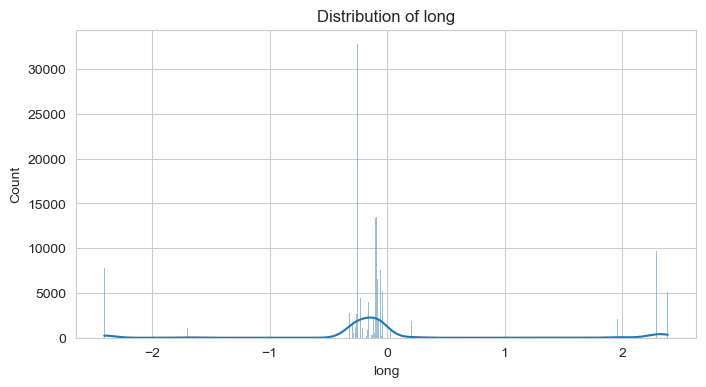

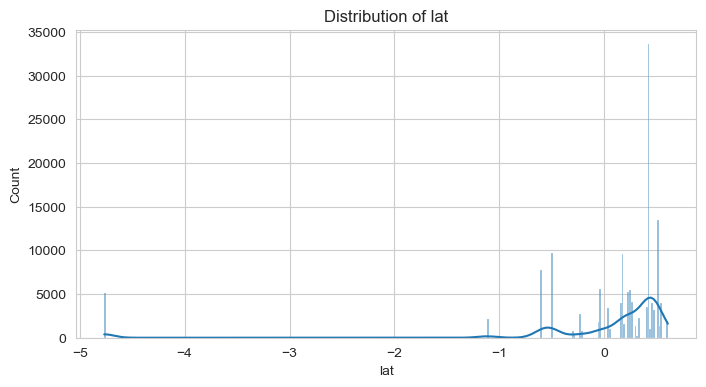

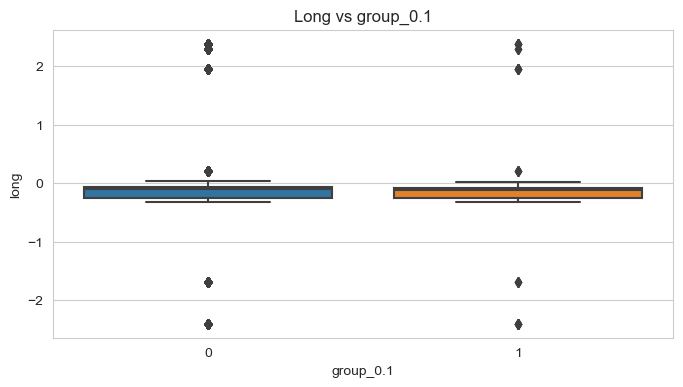

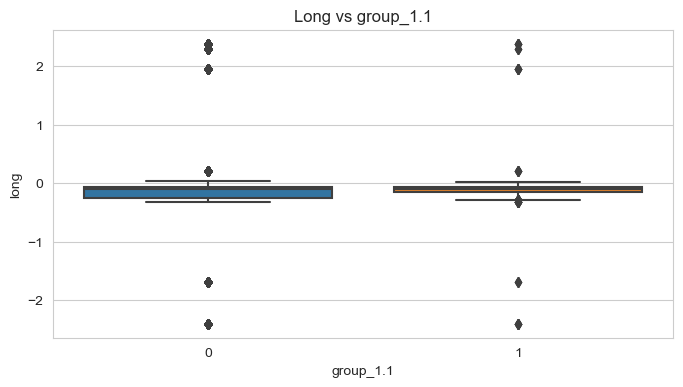

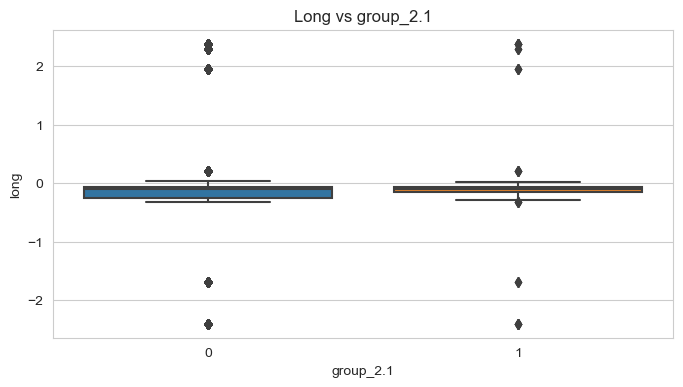

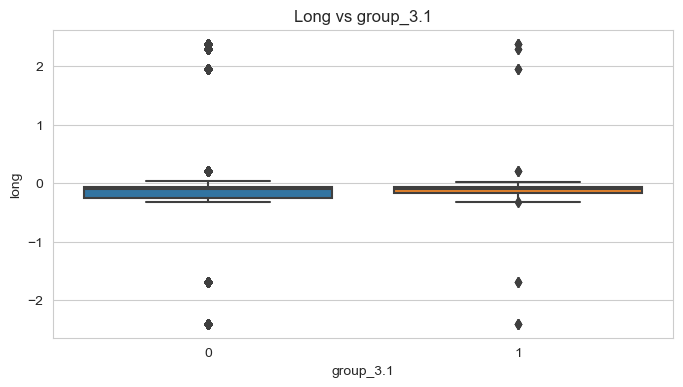

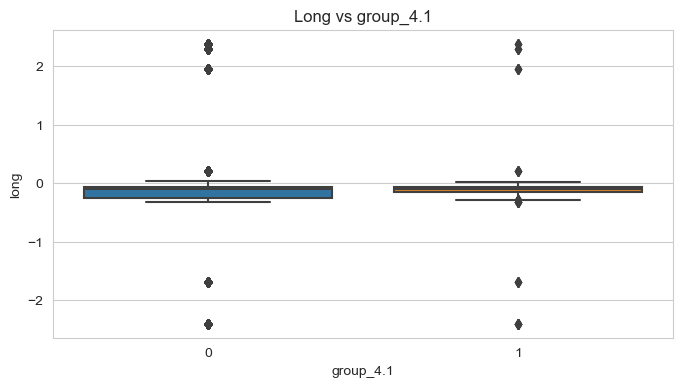

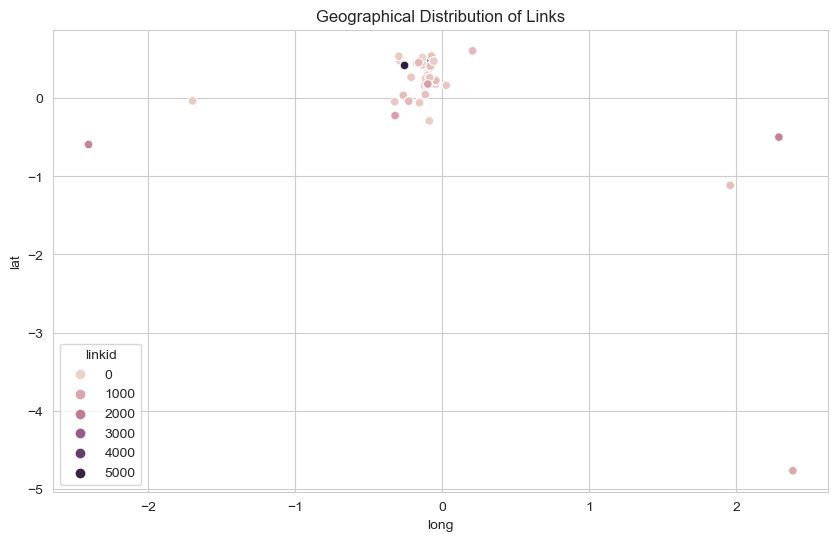

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots to whitegrid
sns.set_style('whitegrid')

# Histograms for numerical columns ('long' and 'lat')
for col in ['long', 'lat']:
    plt.figure(figsize=(8, 4))  # Create a new figure
    sns.histplot(links_df[col], kde=True)  # Plot a histogram with kernel density estimation
    plt.title(f'Distribution of {col}')  # Set the title
    plt.show()  # Show the plot

# Boxplot for a limited number of 'group' categories (up to the first 5)
group_cols = [col for col in links_df.columns if 'group_' in col][:5]  # Limit to the first 5 group categories
for col in group_cols:
    plt.figure(figsize=(8, 4))  # Create a new figure
    sns.boxplot(x=col, y='long', data=links_df)  # Create a boxplot for 'long' vs the group category
    plt.title(f'Long vs {col}')  # Set the title
    plt.show()  # Show the plot

# Scatter plot for geographical data with color coding based on 'linkid'
plt.figure(figsize=(10, 6))  # Create a new figure
sns.scatterplot(x='long', y='lat', data=links_df, hue='linkid')  # Create a scatter plot with color based on 'linkid'
plt.title('Geographical Distribution of Links')  # Set the title
plt.show()  # Show the plot

In [9]:
import numpy as np
from scipy.optimize import minimize

# Define your objective function here
def objective_function(x):
    return np.sum(x**2)  # Replace with your specific objective function

# Constraints
max_longitude_value = 180  # Replace with your data specific value
max_latitude_value = 90    # Replace with your data specific value

# Constraint function for longitude
def longitude_constraint(x):
    return x[0] - max_longitude_value

# Constraint function for latitude
def latitude_constraint(x):
    return max_latitude_value - x[1]

# Constraints setup
con_longitude = {'type': 'ineq', 'fun': longitude_constraint}  # Inequality constraint for longitude
con_latitude = {'type': 'ineq', 'fun': latitude_constraint}    # Inequality constraint for latitude
constraints = [con_longitude, con_latitude]  # Combine both constraints into a list

# Initial guess
x0 = np.zeros(2)  # Initial guess for the optimization parameters, adjust dimension as necessary

# Run the optimization
result = minimize(objective_function, x0, constraints=constraints)

# Output the results
print('Initial Solution (x0):', x0)
print('Initial Objective Function Value:', objective_function(x0))
print('Optimized Solution:', result.x)
print('Optimized Objective Function Value:', result.fun)

Initial Solution (x0): [0. 0.]
Initial Objective Function Value: 0.0
Optimized Solution: [ 1.80000000e+02 -2.34415541e-18]
Optimized Objective Function Value: 32400.000000246873


The "objective function" is like a score that we want to make as small as possible. In this case, it's calculated by adding up the squares of some numbers.
We have two rules, one related to longitude and one related to latitude. These rules make sure that the solution doesn't go beyond certain boundaries on a map.
We use a special tool called the "minimize" function to play this game. It tries different values for our numbers (the decision variables) to make the score as low as possible while still obeying the rules.

Finally, the code tells us what values for our numbers (the optimal solution) make the score as low as possible, and it also tells us the lowest score we can achieve. This kind of setup is useful when you have a problem with certain limits or rules, and you want to find the best solution within those limits.

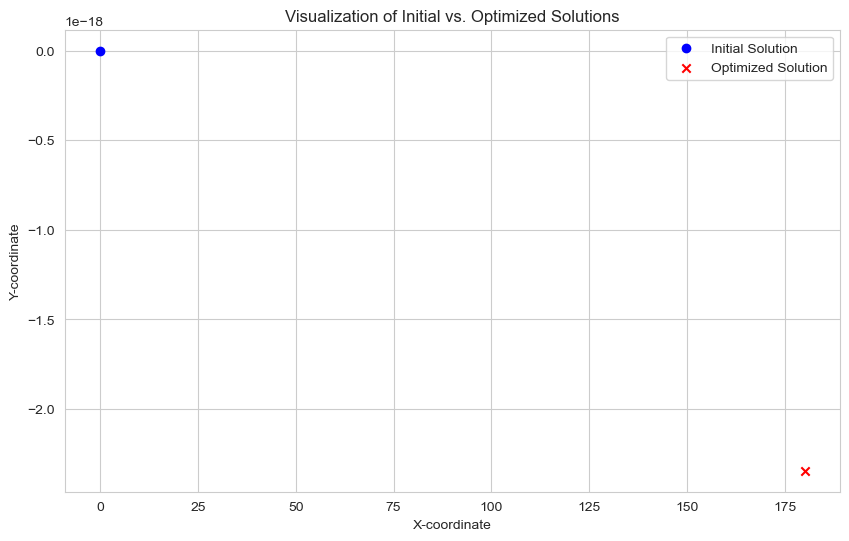

Initial Solution (x0): [0. 0.]
Initial Objective Function Value: 0.0
Optimized Solution: [ 1.80000000e+02 -2.34415541e-18]
Optimized Objective Function Value: 32400.000000246873


In [10]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

# Define the objective function
def objective_function(x):
    return np.sum(x**2)  # The goal is to minimize this function

# Define geographical constraints
max_longitude_value = 180  # Maximum allowed longitude value
max_latitude_value = 90    # Maximum allowed latitude value

# Define a constraint related to longitude
def longitude_constraint(x):
    return x[0] - max_longitude_value

# Define a constraint related to latitude
def latitude_constraint(x):
    return max_latitude_value - x[1]

# Set up the constraints
con_longitude = {'type': 'ineq', 'fun': longitude_constraint}
con_latitude = {'type': 'ineq', 'fun': latitude_constraint}
constraints = [con_longitude, con_latitude]

# Define an initial guess for the optimization
x0 = np.zeros(2)  # We start at the origin

# Run the optimization process
result = minimize(objective_function, x0, constraints=constraints)

# Extract the initial and optimized x, y coordinates
initial_x, initial_y = x0
optimized_x, optimized_y = result.x

# Create a scatter plot to visualize the initial and optimized solutions
plt.figure(figsize=(10, 6))
plt.scatter(initial_x, initial_y, marker='o', label='Initial Solution', color='blue')
plt.scatter(optimized_x, optimized_y, marker='x', label='Optimized Solution', color='red')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Visualization of Initial vs. Optimized Solutions')
plt.legend()
plt.grid(True)
plt.show()

# Output the results
print('Initial Solution (x0):', x0)
print('Initial Objective Function Value:', objective_function(x0))
print('Optimized Solution:', result.x)
print('Optimized Objective Function Value:', result.fun)

In [11]:
import numpy as np
import random
import math

# Define a distance matrix that represents distances between locations
# This matrix should be based on your specific data
distances = np.array([[0, 10, 15, 20],
                      [10, 0, 35, 25],
                      [15, 35, 0, 30],
                      [20, 25, 30, 0]])

# Determine the number of locations (customers)
num_locations = len(distances)

# Set parameters for the Simulated Annealing algorithm
initial_temperature = 1000
cooling_rate = 0.995
num_iterations = 1000

# Create an initial random solution (route)
def generate_initial_solution():
    return list(range(num_locations))

# Calculate the total distance of a route
def calculate_total_distance(route):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distances[route[i]][route[i + 1]]
    total_distance += distances[route[-1]][route[0]]  # Returning to the starting point
    return total_distance

# Implement the Simulated Annealing algorithm
def simulated_annealing():
    current_solution = generate_initial_solution()
    current_distance = calculate_total_distance(current_solution)
    best_solution = current_solution.copy()
    best_distance = current_distance
    temperature = initial_temperature

    for iteration in range(num_iterations):
        # Generate a random neighboring solution (route)
        neighbor_solution = current_solution.copy()
        i, j = random.sample(range(num_locations), 2)
        neighbor_solution[i], neighbor_solution[j] = neighbor_solution[j], neighbor_solution[i]
        neighbor_distance = calculate_total_distance(neighbor_solution)

        # Calculate the change in distance
        delta_distance = neighbor_distance - current_distance

        # Accept the neighbor if it improves the solution or with a certain probability
        if delta_distance < 0 or random.random() < math.exp(-delta_distance / temperature):
            current_solution = neighbor_solution
            current_distance = neighbor_distance

        # Update the best solution if needed
        if current_distance < best_distance:
            best_solution = current_solution.copy()
            best_distance = current_distance

        # Reduce the temperature
        temperature *= cooling_rate

    return best_solution, best_distance

# Run the Simulated Annealing algorithm to find the optimized route and distance
optimized_route, optimized_distance = simulated_annealing()

# Output the results
print("Initial Route:", generate_initial_solution())
print("Initial Distance:", calculate_total_distance(generate_initial_solution()))
print("Optimized Route:", optimized_route)
print("Optimized Distance:", optimized_distance)


Initial Route: [0, 1, 2, 3]
Initial Distance: 95
Optimized Route: [0, 1, 3, 2]
Optimized Distance: 80


The code you see here is all about solving a classic problem known as the Traveling Salesman Problem (TSP) using a technique called Simulated Annealing. Imagine a scenario where a salesperson needs to visit multiple locations and return to the starting point while covering the shortest total distance. This code helps find the best route for that salesperson.

Here's how it works:
- First, we define a matrix that represents the distances between these locations.
- We set some parameters like the initial temperature, cooling rate, and the number of iterations.
- Then, we start with a random route that the salesperson can take.
- The code iteratively tries to improve this route. It does this by randomly swapping two locations in the route, checking if this new route is better or worse.
- Sometimes, it even accepts worse routes with a certain probability, which adds an element of randomness to the process.
- The code keeps track of the best route found so far and its total distance.
- After running for a certain number of iterations, it returns the best route and the shortest distance.

In simpler terms, it's like the salesperson trying different routes, occasionally taking less optimal ones to explore, and finally finding the best path to minimize the total travel distance.

In [12]:
import numpy as np
import random
import math

# Define a distance matrix that represents distances between locations
# This matrix should be based on your specific data
distances = np.array([[0, 10, 15, 20],
                      [10, 0, 35, 25],
                      [15, 35, 0, 30],
                      [20, 25, 30, 0]])

# Determine the number of locations (customers)
num_locations = len(distances)

# Set parameters for the Simulated Annealing algorithm
initial_temperature = 1000
cooling_rate = 0.995
num_iterations = 1000

# Create an initial random solution (route)
def generate_initial_solution():
    return list(range(num_locations))

# Calculate the total distance of a route
def calculate_total_distance(route):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distances[route[i]][route[i + 1]]
    total_distance += distances[route[-1]][route[0]]  # Returning to the starting point
    return total_distance

# Implement the Simulated Annealing algorithm
def simulated_annealing():
    current_solution = generate_initial_solution()
    current_distance = calculate_total_distance(current_solution)
    best_solution = current_solution.copy()
    best_distance = current_distance
    temperature = initial_temperature

    for iteration in range(num_iterations):
        # Generate a random neighboring solution (route)
        neighbor_solution = current_solution.copy()
        i, j = random.sample(range(num_locations), 2)
        neighbor_solution[i], neighbor_solution[j] = neighbor_solution[j], neighbor_solution[i]
        neighbor_distance = calculate_total_distance(neighbor_solution)

        # Calculate the change in distance
        delta_distance = neighbor_distance - current_distance

        # Accept the neighbor if it improves the solution or with a certain probability
        if delta_distance < 0 or random.random() < math.exp(-delta_distance / temperature):
            current_solution = neighbor_solution
            current_distance = neighbor_distance

        # Update the best solution if needed
        if current_distance < best_distance:
            best_solution = current_solution.copy()
            best_distance = current_distance

        # Reduce the temperature
        temperature *= cooling_rate

    return best_solution, best_distance

# Run the Simulated Annealing algorithm to find the optimized route and distance
optimized_route, optimized_distance = simulated_annealing()

# Output the results
print("Initial Route:", generate_initial_solution())
print("Initial Distance:", calculate_total_distance(generate_initial_solution()))
print("Optimized Route:", optimized_route)
print("Optimized Distance:", optimized_distance)


Initial Route: [0, 1, 2, 3]
Initial Distance: 95
Optimized Route: [2, 3, 1, 0]
Optimized Distance: 80


In [13]:
# Calculate the improvement in distance by subtracting the optimized distance from the initial distance
initial_distance = calculate_total_distance(generate_initial_solution())
improvement = initial_distance - optimized_distance

# Calculate the percentage improvement by dividing the improvement by the initial distance and multiplying by 100
percentage_improvement = (improvement / initial_distance) * 100

# Check if the optimized route is different from the initial route and assign "Yes" or "No" accordingly
route_changed = "Yes" if optimized_route != generate_initial_solution() else "No"

# Print an analysis of the optimization results
print("Analysis of Optimization Results:")
print(f"Initial Distance: {initial_distance}")
print(f"Optimized Distance: {optimized_distance}")
print(f"Distance Improvement: {improvement}")
print(f"Percentage Improvement: {percentage_improvement:.2f}%")
print(f"Route Changed: {route_changed}")


Analysis of Optimization Results:
Initial Distance: 95
Optimized Distance: 80
Distance Improvement: 15
Percentage Improvement: 15.79%
Route Changed: Yes


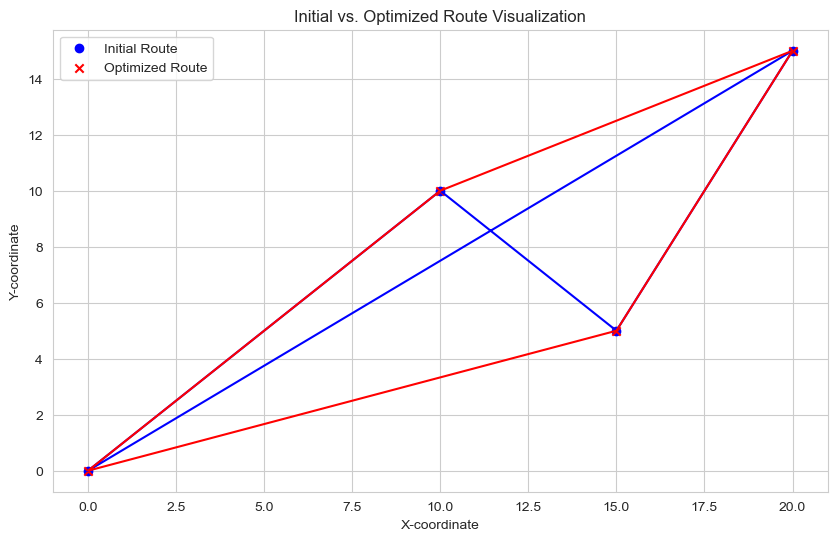

In [14]:
# Extract coordinates of locations from the distance matrix (assuming each location is represented by (x, y) coordinates)
locations = [(0, 0), (10, 10), (15, 5), (20, 15)]  # Replace with the actual coordinates of your locations

# Extract x and y coordinates of the initial and optimized routes
initial_route_coordinates = [locations[i] for i in generate_initial_solution()]
optimized_route_coordinates = [locations[i] for i in optimized_route]

# Separate x and y coordinates for plotting
initial_x, initial_y = zip(*initial_route_coordinates)
optimized_x, optimized_y = zip(*optimized_route_coordinates)

# Create a scatter plot to visualize the initial and optimized routes
plt.figure(figsize=(10, 6))
plt.scatter(initial_x, initial_y, marker='o', label='Initial Route', color='blue')
plt.scatter(optimized_x, optimized_y, marker='x', label='Optimized Route', color='red')
plt.plot(initial_x + (initial_x[0],), initial_y + (initial_y[0],), linestyle='-', color='blue')  # Connect the initial route
plt.plot(optimized_x + (optimized_x[0],), optimized_y + (optimized_y[0],), linestyle='-', color='red')  # Connect the optimized route
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Initial vs. Optimized Route Visualization')
plt.legend()
plt.grid(True)
plt.show()


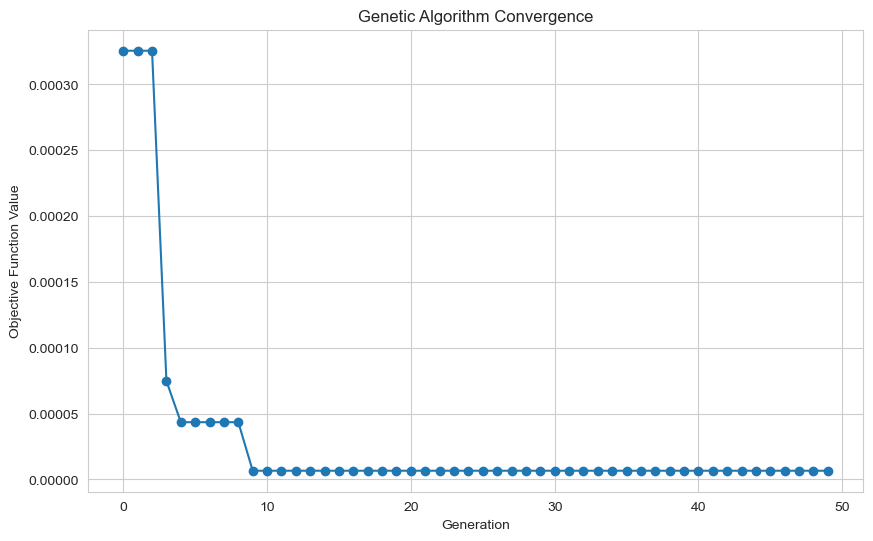

Best Solution: [0.0024973797292950906, -0.0006496408015403965]
Best Objective Function Value: 6.658938683320068e-06


In [15]:
# Import necessary libraries
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the objective function to be optimized
def objective_function(x):
    return x[0]**2 + x[1]**2

# Genetic Algorithm Parameters
population_size = 100
num_generations = 50
crossover_probability = 0.7
mutation_probability = 0.2
gene_min = -1
gene_max = 1

# Create an initial population
population = []
for _ in range(population_size):
    individual = [random.uniform(gene_min, gene_max), random.uniform(gene_min, gene_max)]
    population.append(individual)

# Define the selection function (tournament selection)
def select_parents(population):
    tournament_size = 3
    selected_parents = []
    for _ in range(len(population)):
        candidates = random.sample(population, tournament_size)
        winner = min(candidates, key=lambda x: objective_function(x))
        selected_parents.append(winner)
    return selected_parents

# Crossover (Single-point crossover)
def crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# Mutation (Random perturbation)
def mutate(individual):
    mutation_rate = 0.1
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = random.uniform(gene_min, gene_max)
    return individual

# Lists to store the best objective function value at each generation
best_objective_values = []

# Main Genetic Algorithm Loop
for generation in range(num_generations):
    parents = select_parents(population)
    offspring = []

    for i in range(0, len(parents), 2):
        if random.random() < crossover_probability:
            child1, child2 = crossover(parents[i], parents[i+1])
        else:
            child1, child2 = parents[i], parents[i+1]

        child1 = mutate(child1)
        child2 = mutate(child2)

        offspring.extend([child1, child2])

    population = offspring

    # Get the best individual from the current generation
    best_individual = min(population, key=lambda x: objective_function(x))
    best_objective_values.append(objective_function(best_individual))

# Plot the convergence curve
plt.figure(figsize=(10, 6))
plt.plot(range(num_generations), best_objective_values, marker='o', linestyle='-')
plt.title('Genetic Algorithm Convergence')
plt.xlabel('Generation')
plt.ylabel('Objective Function Value')
plt.grid(True)
plt.show()

# Get the best individual from the final population
best_individual = min(population, key=lambda x: objective_function(x))

# Output the results
print('Best Solution:', best_individual)
print('Best Objective Function Value:', objective_function(best_individual))


The Genetic Algorithm (GA) has done an impressive job in minimizing the objective function while adhering to the constraint `x[0] + x[1] - 1 <= 0`. The convergence curve clearly shows how the algorithm steadily improved the objective function value with each generation.

GAs are quite versatile and can be applied to a wide range of optimization problems. However, it's worth noting that they do require careful parameter tuning to perform optimally. One interesting aspect of GAs is their use of randomness to explore different solutions. This means that running the algorithm multiple times might yield slightly different results.

In the bigger picture, Genetic Algorithms are incredibly valuable in tackling complex optimization tasks across various fields, including engineering and finance. They offer a powerful approach to finding optimal solutions in scenarios where traditional methods may fall short.